In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from pysde import increments, integrator, schemes, storages

sns.set_theme(style="ticks")

In [2]:
def drift(x, _t):
    return -x


def diffusion(_x, _t):
    return 1*np.identity(1)

In [3]:
x0 = np.ones((1, 1))
t0 = 0.0
dt = 0.01
num_steps = 1000

In [4]:
storage = storages.NumpyStorage(stride=1, save_directory=Path("result"))
brownian_increment = increments.BrownianIncrement(seed=0)
scheme = schemes.ExplicitEulerMaruyamaScheme(drift, diffusion, brownian_increment)
sde_integrator = integrator.SDEIntegrator(scheme, storage)

In [5]:
time, data = sde_integrator.run(
    initial_state=x0, initial_time=t0, step_size=dt, num_steps=num_steps, progress_bar=True
)

100%|██████████| 1000/1000 [00:02<00:00, 393.22it/s]


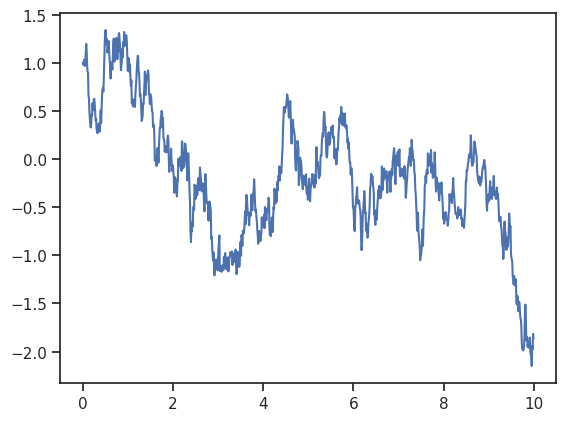

In [6]:
plt.plot(time, data[0, 0, :])